In [3]:
#Установка нужных библиотек. Если таковые уже имеются, то можно пропустить или,
#что лучше, проверить обновление библиотек

In [4]:
!python.exe -m pip install --upgrade pip

%pip install deap
%pip install numpy
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip


In [5]:
#Импорт всего, что нужно

In [28]:
from deap import creator, base, tools, algorithms
import numpy
import random
import matplotlib.pyplot as plt

In [7]:
#Создадим некоторые константы для работы

In [29]:
#Константы задачи
ONE_TO_MAX_LENGTH = 100

#Константы Г.А.
POPULATION_SIZE=200
P_CROSSOVER=0.9
P_MUTATION=0.1
MAX_GENERATIONS=50

In [9]:
#Сделаем генератор случайных чисел, чтобы внести щепотку хаоса в эту кашу

In [31]:
RANDOM_SEED = random.randint(0,100)
random.seed(RANDOM_SEED)

In [ ]:
#Сделаем функцию генерации случайных чисел в лист, заполняя его 

In [32]:
toolbox = base.Toolbox()
toolbox.register("zerotoOne", random.randint,0,1)

In [ ]:
#Создаём класс FitnessMax

In [33]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

C:\object_detection\TFODCourse\Omar\lib\site-packages\deap\creator.py:188: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
#Создаём класс индивидуума для работы

In [34]:
creator.create("Individual", list, fitness=creator.FitnessMax)

C:\object_detection\TFODCourse\Omar\lib\site-packages\deap\creator.py:188: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
#После чего создаём экземпляры этого класса

In [37]:
toolbox.register("individualCreator", tools.initRepeat, 
                 creator.Individual, toolbox.zerotoOne, ONE_TO_MAX_LENGTH)

In [ ]:
#И, наконец, создаём популяцию дебилов

In [38]:
toolbox.register("populationCreator",tools.initRepeat,
                list, toolbox.individualCreator)

In [ ]:
#Объявим функцию приспособленности и зарегистрируем её

In [43]:
def oneToMax(individual):
    return sum(individual),

toolbox.register("evaluate", oneToMax)

In [ ]:
#Объявим генетические операторы

In [40]:
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mate",tools.cxOnePoint)
toolbox.register("mutate",tools.mutFlipBit, indpb=1.0/ONE_TO_MAX_LENGTH)

In [ ]:
#ЭВОЛЮЦИЯ РЕШЕНИЯ

gen	nevals	max	avg  
0  	200   	66 	49.61
1  	187   	67 	53.405
2  	182   	71 	57.17 
3  	178   	70 	60.865
4  	186   	74 	64.045
5  	186   	76 	66.92 
6  	178   	77 	69.53 
7  	179   	80 	71.66 
8  	181   	81 	73.915
9  	184   	82 	76.25 
10 	184   	83 	78.155
11 	187   	85 	79.77 
12 	182   	87 	81.61 
13 	183   	90 	83.285
14 	169   	91 	84.76 
15 	187   	91 	85.94 
16 	178   	91 	87.29 
17 	186   	92 	88.65 
18 	176   	93 	89.785
19 	188   	94 	90.965
20 	174   	94 	91.93 
21 	171   	96 	92.655
22 	181   	96 	93.34 
23 	187   	97 	94.115
24 	187   	97 	94.865
25 	183   	98 	95.625
26 	188   	98 	96.41 
27 	185   	98 	97.005
28 	180   	99 	97.555
29 	186   	99 	97.965
30 	172   	100	98.195
31 	176   	100	98.565
32 	185   	100	98.97 
33 	180   	100	99.055
34 	176   	100	99.255
35 	185   	100	99.625
36 	180   	100	99.895
37 	179   	100	99.865
38 	182   	100	99.895
39 	183   	100	99.885
40 	180   	100	99.905
41 	181   	100	99.925
42 	178   	100	99.9  
43 	186   	100	99.925
44 	181   	1

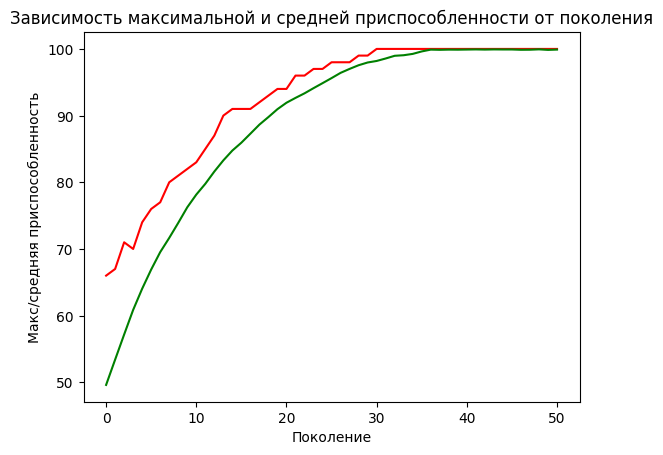

In [48]:
def main():
    
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)
    
    population, logbook = algorithms.eaSimple(population,toolbox,
                                             cxpb=P_CROSSOVER,
                                             mutpb=P_MUTATION,
                                             ngen=MAX_GENERATIONS,
                                             stats=stats, verbose=True)
    
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color = "green")
    plt.xlabel('Поколение')
    plt.ylabel('Макс/средняя приспособленность')
    plt.title('Зависимость максимальной и средней приспособленности от поколения')
    plt.show()
        
     
if __name__ == "__main__":
    main()
